In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# Getting the path to the dataset from google drive
dataset_path = 'https://drive.usercontent.google.com/download?id=1_pmpCHgsscrWCBWS_BeR2A65Ka4_vc-m&export=download&authuser=0'

# Reading the dataset into a Pandas DataFrame.
data = pd.read_csv(dataset_path)


In [ ]:
# Data Cleaning and Preprocessing
# Drop rows with missing values
data.dropna(subset=['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency'], inplace=True)

# Check if columns exist before dropping
columns_to_drop = ['ID', 'Bedtime', 'Wakeup time']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

# Convert categorical columns using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoking status'], drop_first=True)

# Split the data into features and target variable
X = data_encoded.drop('Sleep efficiency', axis=1)
y = data_encoded['Sleep efficiency']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model Building
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print("Linear regression Root Mean Squared Error is ")
print(linear_rmse)

Linear regression Root Mean Squared Error is 
0.06523560763175269


In [27]:
# K-Nearest Neighbors Regression Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
print("K-Nearest Neighbor Root Mean Squared Error is ")
print(knn_rmse)

K-Nearest Neighbor Root Mean Squared Error is 
0.06595297470012154


In [25]:
#Random Forest Regression Model
RF_model = RandomForestRegressor(n_estimators=100)
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
RF_mse = mean_squared_error(y_test, RF_predictions)
RF_rmse = np.sqrt(RF_mse)
print("Random Forest Root Mean Squared Error is ")
print(RF_rmse)

Random Forest Root Mean Squared Error is 
0.04134748465359759


In [28]:
#Elastic model regression model
Elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
Elastic_model.fit(X_train, y_train)
Elastic_predictions = Elastic_model.predict(X_test)
Elastic_mse = mean_squared_error(y_test, Elastic_predictions)
Elastic_rmse = np.sqrt(Elastic_mse)
print("Elastic Model Root Mean Squared Error is")
print(Elastic_rmse)

Elastic Model Root Mean Squared Error is
0.08633300149792604


Text(0, 0.5, 'Predicted values')

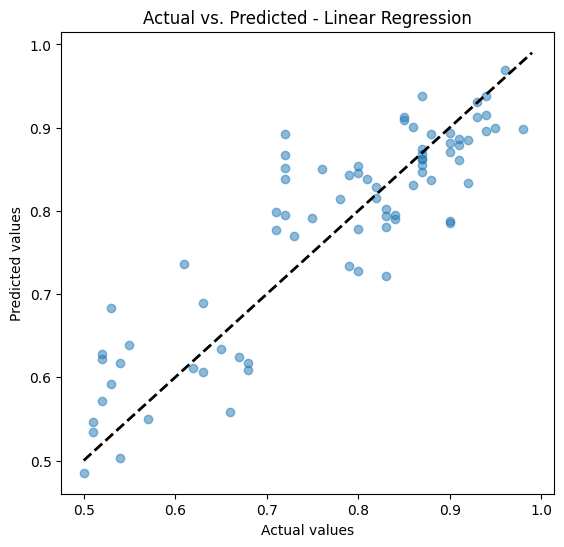

In [31]:
# Visualization
plt.figure(figsize=(14, 6))
#Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

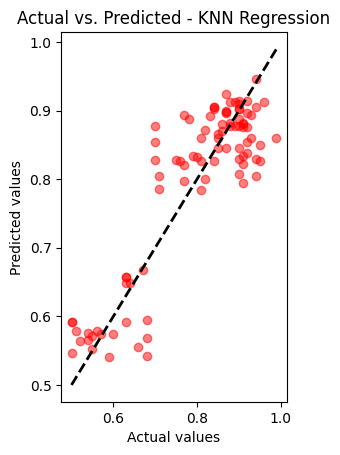

In [ ]:
# K-Nearest Neighbors Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_predictions, alpha=0.5, color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - KNN Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

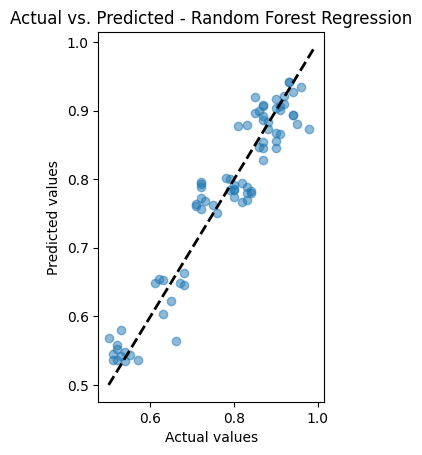

In [22]:
#Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, RF_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - Random Forest Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

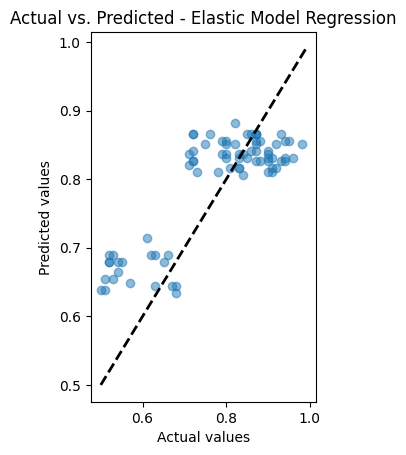

In [24]:
#Elastic Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, Elastic_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - Elastic Model Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')